## What is time series.

Time series is a sequence of observations recorded at regular time intervals. These intervals can be days months or even years.
 

## Importing Data set

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

df = pd.read_csv('PV_Elec_Gas3.csv', parse_dates=['date'])
df.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


Read this guide for parsing the date into the system otherwise the date will be read as having a different data type. 
https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3304 non-null   datetime64[ns]
 1   Cumulative_solar_power  3304 non-null   float64       
 2   kWh electricity/day     3304 non-null   float64       
 3   Gas/day                 3304 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 103.4 KB


In [6]:
df.columns = ['Date', 'Cumulative_Solar_power', 'kWh_electricity_per_day', 'Gas_per_day']

In [7]:
df.columns

Index(['Date', 'Cumulative_Solar_power', 'kWh_electricity_per_day',
       'Gas_per_day'],
      dtype='object')

## Visualizing Time series

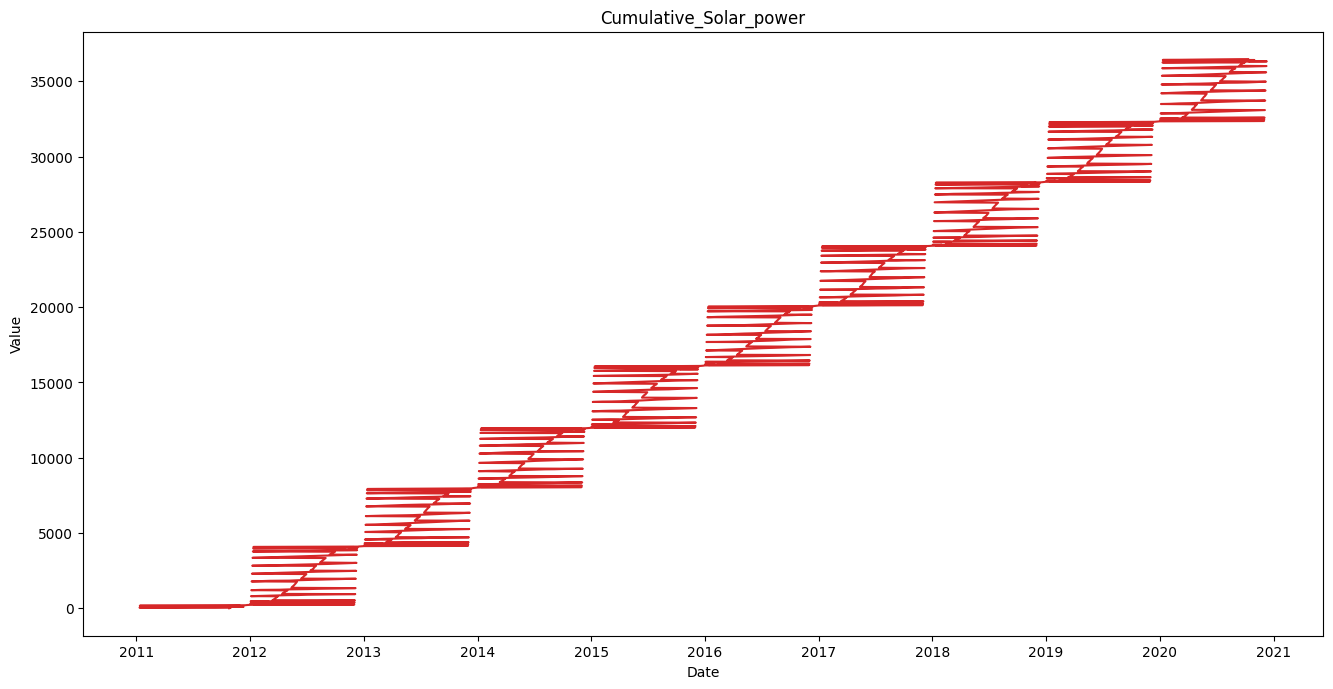

In [13]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.Date, y=df.Cumulative_Solar_power, title='Cumulative_Solar_power')    

## Year wise Time series Plot

In [19]:
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

df.head()

,Date,Cumulative_Solar_power,kWh_electricity_per_day,Gas_per_day,year,month
0,2011-10-26,0.1,15.1,9.0,2011,Oct
1,2011-10-27,10.2,7.4,9.2,2011,Oct
2,2011-10-28,20.2,5.8,8.0,2011,Oct
3,2011-10-29,29.6,4.9,6.6,2011,Oct
4,2011-10-30,34.2,11.7,5.3,2011,Oct


In [23]:
for i in enumerate(years):
  print(i)

(0, 2011)
(1, 2012)
(2, 2013)
(3, 2014)
(4, 2015)
(5, 2016)
(6, 2017)
(7, 2018)
(8, 2019)
(9, 2020)


In [25]:
df.year

0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
3299    2020
3300    2020
3301    2020
3302    2020
3303    2020
Name: year, Length: 3304, dtype: int64

In [32]:
df.loc[df.year == y,:].shape

(366, 6)

In [29]:
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue'], dtype='<U31')

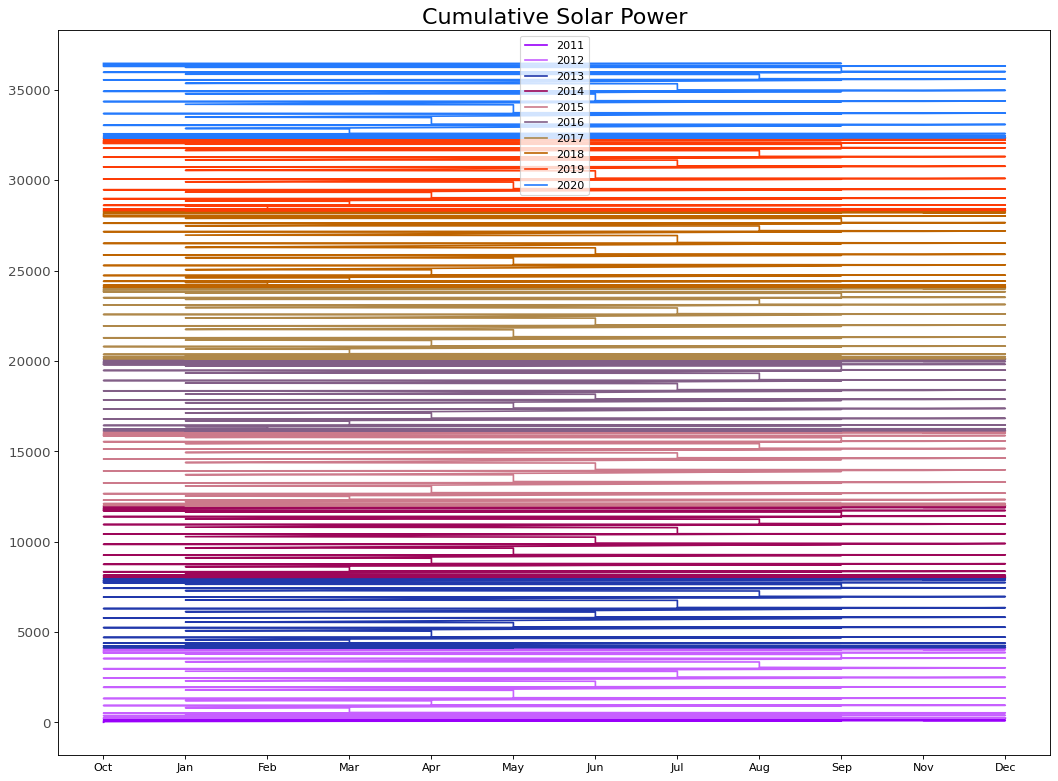

In [43]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    #print(i, y)
    #if i > 0: 
    plt.plot(df.loc[df.year==y, :]["month"], df.loc[df.year==y, :]["Cumulative_Solar_power"], color=mycolors[i], label=y)
    #df.loc[df.year==y, :].plot(kind = 'line', x = 'month', y = 'Cumulative_Solar_power', color=mycolors[i], label=y)     
        #plt.plot('month', 'Cumulative_Solar_Power', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        #plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.Cumulative_Solar_power==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Solar Power$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Cumulative Solar Power", fontsize=20)
plt.legend()
plt.show()

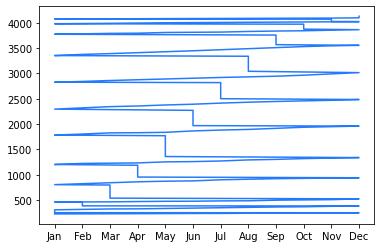

In [48]:
plt.plot(df.loc[df.year==2012, :]["month"], df.loc[df.year==2012, :]["Cumulative_Solar_power"], color=mycolors[i], label=2012)
plt.show()

## Box plot

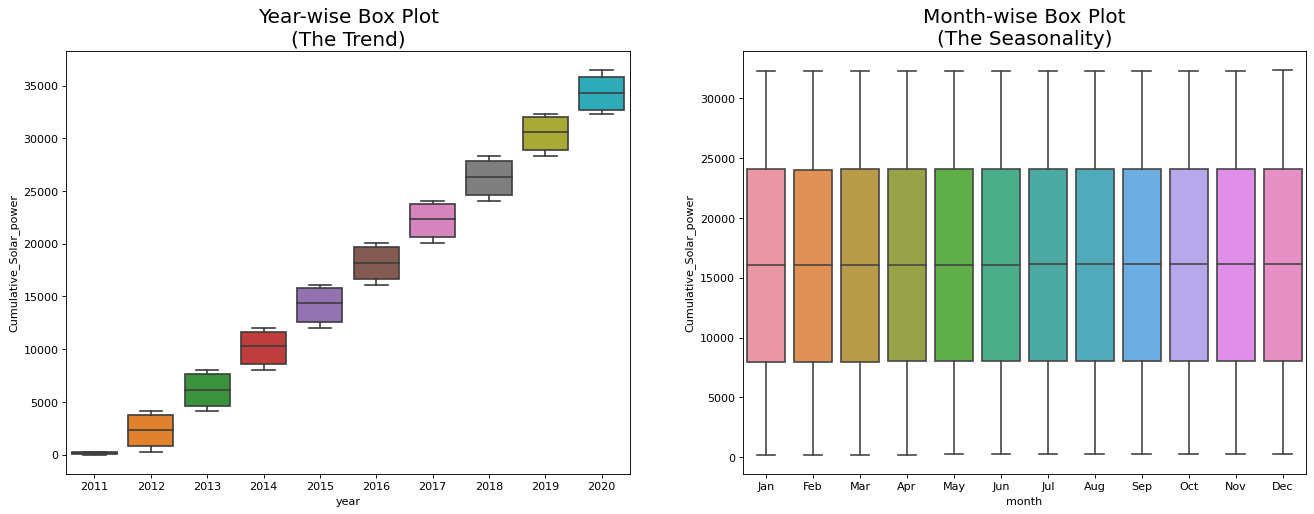

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Cumulative_Solar_power', data=df, ax=axes[0])
sns.boxplot(x='month', y='Cumulative_Solar_power', data=df.loc[~df.year.isin([2011, 2020]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [50]:
df.loc[~df.year.isin([2011, 2020]), :]

,Date,Cumulative_Solar_power,kWh_electricity_per_day,Gas_per_day,year,month
67,2012-01-01,226.7,16.0,13.6,2012,Jan
68,2012-02-01,227.5,18.8,10.6,2012,Feb
69,2012-03-01,230.4,15.5,11.7,2012,Mar
70,2012-04-01,231.2,19.3,19.3,2012,Apr
71,2012-05-01,233.9,6.9,10.6,2012,May
...,...,...,...,...,...,...
2984,2019-12-27,32329.0,11.0,14.0,2019,Dec
2985,2019-12-28,32330.0,16.0,13.0,2019,Dec
2986,2019-12-29,32333.0,18.0,15.0,2019,Dec
2987,2019-12-30,32336.0,15.0,16.0,2019,Dec


In [51]:
df.loc[df.year.isin([2011, 2020]), :]

,Date,Cumulative_Solar_power,kWh_electricity_per_day,Gas_per_day,year,month
0,2011-10-26,0.1,15.1,9.0,2011,Oct
1,2011-10-27,10.2,7.4,9.2,2011,Oct
2,2011-10-28,20.2,5.8,8.0,2011,Oct
3,2011-10-29,29.6,4.9,6.6,2011,Oct
4,2011-10-30,34.2,11.7,5.3,2011,Oct
...,...,...,...,...,...,...
3299,2020-06-11,36445.0,16.0,11.0,2020,Jun
3300,2020-07-11,36453.0,13.0,13.0,2020,Jul
3301,2020-08-11,36461.0,12.0,11.0,2020,Aug
3302,2020-09-11,36466.0,14.0,10.0,2020,Sep
